<a href="https://colab.research.google.com/github/cinthia005/Lab-PDI/blob/main/AF5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACTIVIDAD FUNDAMENTAL 5 - PROCESANIENTO DIGITAL DE IMAGENES**
CINTHIA JANETH PECINA HERNANDEZ 2062979 IB:

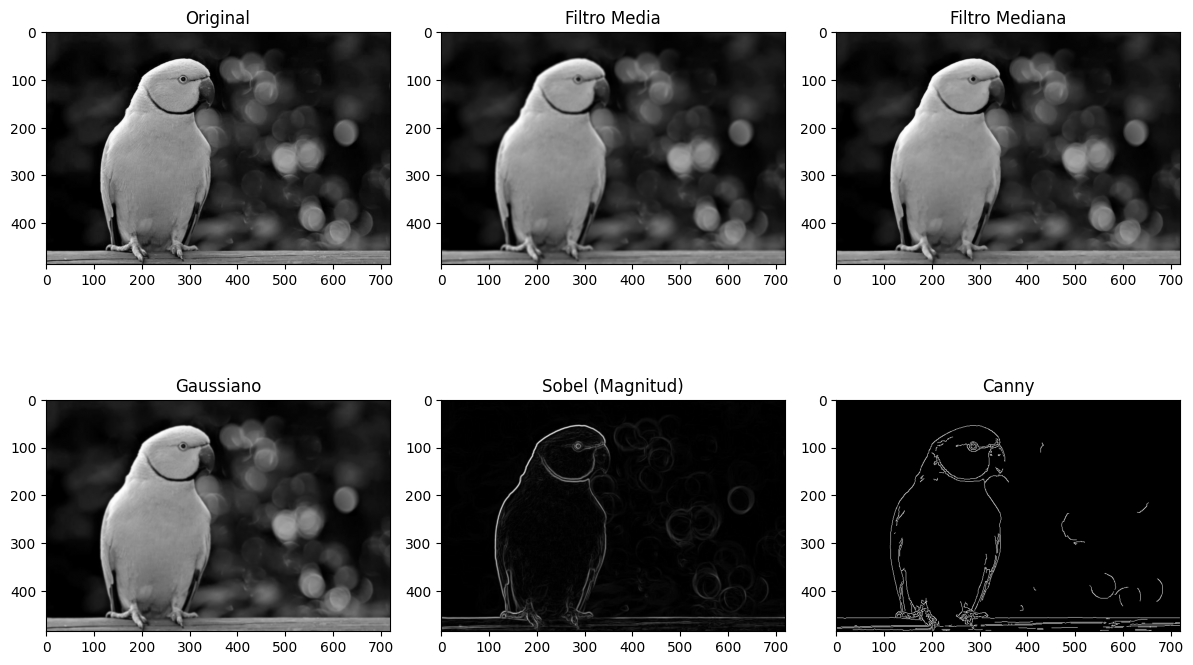

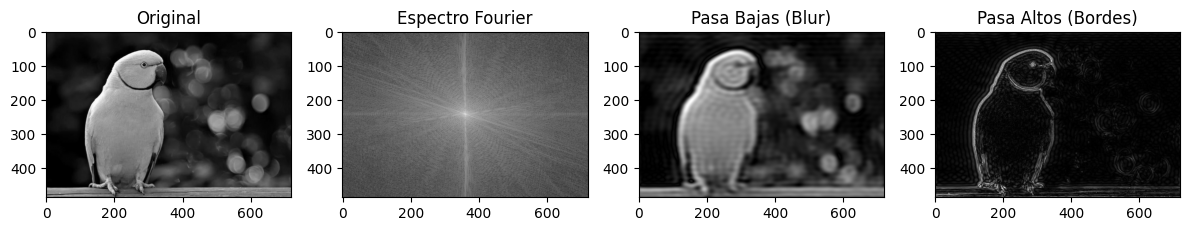

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# CONFIGURACIÓN INICIAL
# ==========================================
# 1. Cargar imagen en escala de grises
img_path = 'ave_3.jpg'
img = cv2.imread(img_path, 0)

if img is None:
    print("Error: No se encontró la imagen.")
else:
    # ==========================================
    # PARTE 1: FILTROS ESPACIALES BÁSICOS
    # ==========================================

    # Filtro de Media (Suavizado simple, kernel 5x5)
    # Promedia los vecinos, útil para reducir ruido aleatorio suave.
    blur_media = cv2.blur(img, (5, 5))

    # Filtro Gaussiano (Suavizado natural, sigma=0 calculado auto)
    # Reduce ruido gaussiano manteniendo mejor estructura que la media.
    blur_gauss = cv2.GaussianBlur(img, (5, 5), 0)

    # Filtro de Mediana (No lineal)
    # Perfecto para ruido "sal y pimienta". El kernel debe ser impar (5).
    blur_median = cv2.medianBlur(img, 5)

    # ==========================================
    # PARTE 2: FILTROS AVANZADOS (BORDES)
    # ==========================================

    # Sobel (Gradiente)
    # Detecta cambios de intensidad. Combinamos X y Y.
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = np.sqrt(sobelx**2 + sobely**2)

    # Canny (Bordes óptimos)
    # Umbrales 100 y 200 para histéresis. Bordes finos.
    edges_canny = cv2.Canny(img, 100, 200)

    # Visualización Espacial
    plt.figure(figsize=(12, 8))
    plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(232), plt.imshow(blur_media, cmap='gray'), plt.title('Filtro Media')
    plt.subplot(233), plt.imshow(blur_median, cmap='gray'), plt.title('Filtro Mediana')
    plt.subplot(234), plt.imshow(blur_gauss, cmap='gray'), plt.title('Gaussiano')
    plt.subplot(235), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel (Magnitud)')
    plt.subplot(236), plt.imshow(edges_canny, cmap='gray'), plt.title('Canny')
    plt.tight_layout()
    plt.show()

    # ==========================================
    # PARTE 3: FILTRADO EN FRECUENCIA (FOURIER)
    # ==========================================

    # 1. Transformada de Fourier (DFT)
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft) # Centrar bajas frecuencias

    # Visualizar Magnitud (Espectro)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

    # Preparar máscaras
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    radio = 30

    # --- Filtro Pasa Bajas (Low Pass) ---
    # Círculo blanco en el centro (pasan bajas), negro afuera (bloquea altas)
    mask_lp = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask_lp, (ccol, crow), radio, 1, thickness=-1)

    # Aplicar máscara y reconstruir
    fshift_lp = dft_shift * mask_lp
    img_back_lp = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_lp)))

    # --- Filtro Pasa Altos (High Pass) ---
    # Inverso: Negro en el centro (bloquea bajas), blanco afuera (pasan altas)
    mask_hp = np.ones((rows, cols), np.uint8)
    cv2.circle(mask_hp, (ccol, crow), radio, 0, thickness=-1)

    # Aplicar máscara y reconstruir
    fshift_hp = dft_shift * mask_hp
    img_back_hp = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_hp)))

    # Visualización Frecuencial
    plt.figure(figsize=(12, 4))
    plt.subplot(141), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(142), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Espectro Fourier')
    plt.subplot(143), plt.imshow(img_back_lp, cmap='gray'), plt.title('Pasa Bajas (Blur)')
    plt.subplot(144), plt.imshow(img_back_hp, cmap='gray'), plt.title('Pasa Altos (Bordes)')
    plt.tight_layout()
    plt.show()